# Part 1: Web Scraping (Using Python)

In [108]:
import requests
from bs4 import BeautifulSoup
import csv

RATING_MAP = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
books = []

for page in range(1, 51):
    url = base_url.format(page)
    response = requests.get(url)
    response.encoding = 'utf-8'  # Force UTF-8 encoding
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all("article", class_="product_pod")

    for article in articles:
        title = article.h3.a['title']
        
        # Clean price string
        price_text = article.find('p', class_='price_color').text
        price_clean = price_text.replace('Â', '').replace('£', '').strip()
        price = float(price_clean)
        
        availability = article.find('p', class_='instock availability').text.strip()
        rating_class = article.p.get('class')[1]
        rating = RATING_MAP.get(rating_class, 0)

        books.append([title, price, availability, rating])

# Write data to CSV
with open('books_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['title', 'price', 'availability', 'rating'])
    writer.writerows(books)

print("Data scraping complete. Data saved to 'books_data.csv'.")


Data scraping complete. Data saved to 'books_data.csv'.


# Part 2: SQL Insights

In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 762.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/16.4 MB 762.0 kB/s eta 0:00:21
   - -------------------------------------- 0.8/16.4 MB 799.2 kB/s eta 0:00:20
   - -------------------------------------- 0.8/16.4 MB 799.2 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/16.4 MB 739.8 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/16.4 MB 739.8 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/16.4 MB 739.8 kB/s eta 0:00:21
   --- ------------------------------------ 1.3/16.4 MB 615.7 kB/s eta 0:00:25
   --- ----------

In [14]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd

import mysql.connector

#Connect to MySQL

conn = mysql.connector.connect(

    host="localhost",

    user="root",

    password="Diya@123",

    database="bookstoree"

)

cursor = conn.cursor()

In [91]:
# Assuming your connection is still active
cursor = conn.cursor()  # Reinitialize a new cursor
cursor.execute("SELECT * FROM books_scrape")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()  # Close the cursor when done


True

In [93]:
import pandas as pd
import mysql.connector

# Step 1: Load CSV
df = pd.read_csv("books_data.csv")

# Step 2: Connect to MySQL
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Diya@123",
        database="bookstoree"
    )

    if conn.is_connected():
        print("Connected to MySQL.")

    cursor = conn.cursor()

    # Step 3: Create table (if not exists)
    create_table_query = """
    CREATE TABLE IF NOT EXISTS books_scrape (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        price FLOAT,
        availability VARCHAR(100),
        rating INT
    );
    """
    cursor.execute(create_table_query)
    conn.commit()
    print(" Table 'books_scrape' is ready.")

    # Step 4: Insert data
    insert_query = """
    INSERT INTO books_scrape (title, price, availability, rating)
    VALUES (%s, %s, %s, %s)
    """
    for _, row in df.iterrows():
        cursor.execute(insert_query, (
            row['title'],
            float(row['price']),
            row['availability'],
            int(row['rating'])
        ))

    conn.commit()
    print(f" Inserted {len(df)} rows into 'books_scrape'.")

except mysql.connector.Error as err:
    print(" MySQL Error:", err)

finally:
    # Step 5: Clean up
    if 'cursor' in locals() and cursor:
        cursor.close()
    if 'conn' in locals() and conn.is_connected():
        conn.close()
    print(" Connection closed.")


Connected to MySQL.
 Table 'books_scrape' is ready.
 Inserted 1000 rows into 'books_scrape'.
 Connection closed.


## Find the number of books available in stock.

In [95]:
import mysql.connector

# Step 1: Reconnect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Diya@123",
    database="bookstoree"
)
cursor = conn.cursor()

# Step 2: Count 'In stock' books
query = """
SELECT COUNT(*) FROM books_scrape
WHERE availability LIKE '%In stock%';
"""
cursor.execute(query)
result = cursor.fetchone()
count_in_stock = result[0]

# Step 3: Print result
print(f" Total books in stock: {count_in_stock}")

# Step 4: Close connection
cursor.close()
conn.close()


 Total books in stock: 1000


In [97]:
# To clear the record
# cursor = conn.cursor()
# cursor.execute("DELETE FROM books_scrape")
# conn.commit()
# print("Table 'books_scrape' has been cleared.")


## List the top 5 most expensive books.

In [99]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Diya@123",
    database="bookstoree"
)
cursor = conn.cursor()

query = """
SELECT title, price, rating FROM books_scrape
ORDER BY price DESC
LIMIT 5;
"""
cursor.execute(query)
rows = cursor.fetchall()

print(" Top 5 Most Expensive Books:\n")
for row in rows:
    print(f"Title: {row[0]}\nPrice: £{row[1]}\nRating: {row[2]}/5\n{'-'*40}")


 Top 5 Most Expensive Books:

Title: The Perfect Play (Play by Play #1)
Price: £59.99
Rating: 3/5
----------------------------------------
Title: Last One Home (New Beginnings #1)
Price: £59.98
Rating: 3/5
----------------------------------------
Title: Civilization and Its Discontents
Price: £59.95
Rating: 2/5
----------------------------------------
Title: The Barefoot Contessa Cookbook
Price: £59.92
Rating: 5/5
----------------------------------------
Title: The Diary of a Young Girl
Price: £59.9
Rating: 3/5
----------------------------------------


## Find the average rating of books.

In [103]:
cursor.execute("SELECT AVG(rating) FROM books_scrape;")
avg_rating = cursor.fetchone()[0]
print(f"\n Average Rating of All Books: {round(avg_rating, 2)} / 5")



 Average Rating of All Books: 2.92 / 5


## Retrieve the total number of books for each rating (e.g., 1-star, 2-star, etc.).

In [105]:
cursor.execute("""
SELECT rating, COUNT(*) AS count
FROM books_scrape
GROUP BY rating
ORDER BY rating DESC;
""")
results = cursor.fetchall()

print("\n Book Count by Rating:\n")
for rating, count in results:
    print(f" {rating}-Star: {count} books")



 Book Count by Rating:

 5-Star: 196 books
 4-Star: 179 books
 3-Star: 203 books
 2-Star: 196 books
 1-Star: 226 books


# Part 3: Exploratory Data Analysis (EDA) and Data Visualization

### Load the CSV into a Pandas DataFrame.

In [23]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('books_data.csv')

# Display first few rows
print(df.head())


                                   title  price availability  rating
0                   A Light in the Attic  51.77     In stock       3
1                     Tipping the Velvet  53.74     In stock       1
2                             Soumission  50.10     In stock       1
3                          Sharp Objects  47.82     In stock       4
4  Sapiens: A Brief History of Humankind  54.23     In stock       5


### Display basic statistics about the dataset 

In [7]:
# Basic Info
print("\n\n Data Info:")
print(df.info())



 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   availability  1000 non-null   object 
 3   rating        1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None


In [19]:
# Summary Stats
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
            price       rating
count  1000.00000  1000.000000
mean     35.07035     2.923000
std      14.44669     1.434967
min      10.00000     1.000000
25%      22.10750     2.000000
50%      35.98000     3.000000
75%      47.45750     4.000000
max      59.99000     5.000000


In [21]:
# Missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
title           0
price           0
availability    0
rating          0
dtype: int64


In [17]:
# Number of books
print(f"\n Total number of books: {len(df)}")


 Total number of books: 1000


In [15]:
# Average price
print(f" Average book price: £{df['price'].mean():.2f}")

 Average book price: £35.07


# Data Visualization

### Bar chart of the number of books for each rating (1 to 5 stars).

C:\Users\DIYA\AppData\Local\Temp\ipykernel_1756\4101846530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


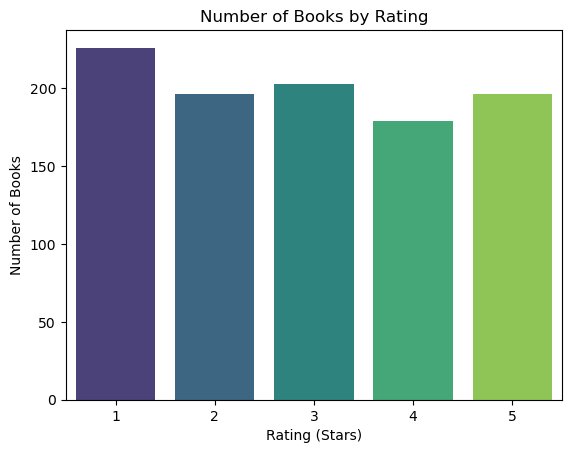

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


rating_counts = df['rating'].value_counts().sort_index()


sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Number of Books by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Books')
plt.show()


### Histogram showing the distribution of book prices.

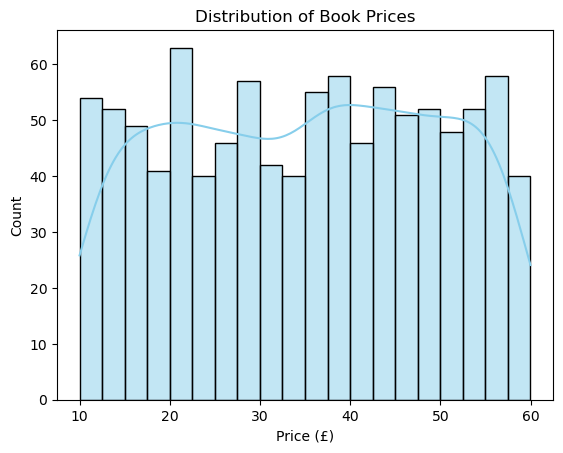

In [32]:
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()


### Pie chart representing the proportion of books in stock vs. out of stock

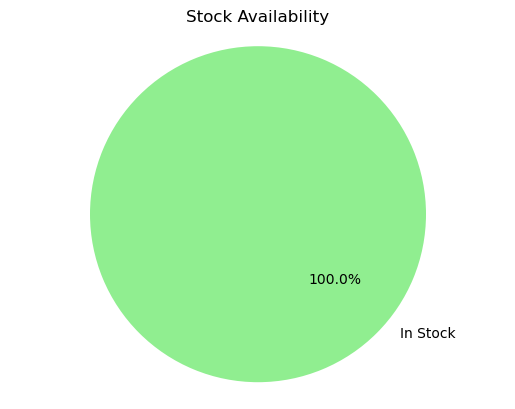

In [47]:
df['in_stock'] = df['availability'].str.contains('In stock')

stock_counts = df['in_stock'].value_counts()

labels = ['In Stock' if val else 'Out of Stock' for val in stock_counts.index]

plt.pie(stock_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=140)
plt.title('Stock Availability')
plt.axis('equal')
plt.show()


### Any other creative visualization that helps understand the dataset. — Price vs Rating (Box Plot)

C:\Users\DIYA\AppData\Local\Temp\ipykernel_1756\621617582.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='price', palette='pastel')


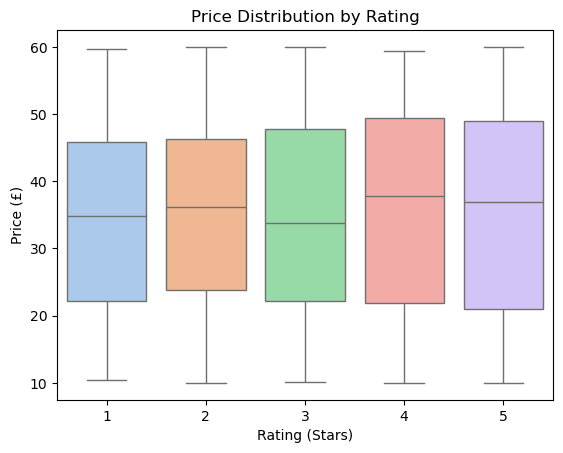

In [40]:
sns.boxplot(data=df, x='rating', y='price', palette='pastel')
plt.title('Price Distribution by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price (£)')
plt.show()
